This notebook demonstrates how to build, train, and evaluate two simple Multi-Layer Perceptron (MLP) models for classifying handwritten digits from the MNIST dataset. The task is to compare the performance of a model with no dropout against a model with a dropout rate of 0.2, specifically looking at how dropout affects overfitting.

Load the MNIST dataset from Keras and preprocess the images for the MLP model. This involves normalizing the pixel values and flattening the images into vectors.

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Define brand colors for graphs
logo_black = "#000000"
logo_blue = "#1b45eb"

This cell loads the MNIST dataset, which consists of handwritten digits. It then preprocesses the data by normalizing the pixel values of the images to be between 0 and 1 and flattens the 28x28 images into 784-element vectors. The data is split into training and testing sets.

In [ ]:
# Load the MNIST dataset from Keras (handwritten digits: 0–9)
# x_train and x_test are images (28x28), y_train and y_test are their labels
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the images: pixel values from [0, 255] → [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Flatten the 28x28 images into 784-element vectors
x_train = x_train.reshape(-1, 28 * 28)
x_test  = x_test.reshape(-1, 28 * 28)

1. Complete the missing parts in the code below:

* Define the input shape for the images (hint: 28×28 = 784).

* Choose the correct activation function for each layer from the list:
ELU / ReLU / GeLU / Sigmoid / Softmax

* Defien the optimizer as 'adam'

In [ ]:
# ----------------------------------------------------
# FUNCTION TO BUILD A FULLY CONNECTED NEURAL NETWORK
# ----------------------------------------------------
def build_mlp(dropout_rate):
    """
    Constructs a simple Multi-Layer Perceptron (MLP) with two hidden layers.
    dropout_rate: float between 0.0 and 1.0. The probability of dropping neurons during training.
    """
    model = models.Sequential([
        layers.Input(shape=(784,)),                     # 784 = 28x28 pixels
        layers.Dense(256, activation='gelu'),           # First hidden layer with GELU activation
        layers.Dropout(dropout_rate),                   # Dropout layer to prevent overfitting
        layers.Dense(128, activation='gelu'),           # Second hidden layer
        layers.Dropout(dropout_rate),                   # Another dropout
        layers.Dense(10, activation='softmax')          # Output layer: 10 classes (digits 0-9)
    ])

    # Compile the model with Adam optimizer and cross-entropy loss
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

2. Train two models:

* One with dropout_rate = 0.0 (no dropout).

* One with dropout_rate = 0.2.

* Save each model and its history.

In [ ]:
# ----------------------------------------------------
# FUNCTION TO TRAIN A MODEL AND RETURN HISTORY
# ----------------------------------------------------
def train_model(dropout_rate, label):
    """
    Trains the MLP model with a specific dropout rate.
    Returns the trained model and training history.
    """
    print(f"\nTraining model with Dropout = {dropout_rate} ({label})")
    model = build_mlp(dropout_rate)
    history = model.fit(
        x_train, y_train,
        validation_data=(x_test, y_test),
        epochs=50,
        batch_size=64,
        verbose=1   # Change to 0 if you don't want to see training output
    )
    return model, history

In [ ]:
# ----------------------------------------------------
# Train two models: one with Dropout 0, one with 0.2
# ----------------------------------------------------
model_0, hist_0 = train_model(0, "Dropout 0")
model_02, hist_02 = train_model(0.2, "Dropout 0.2")


Training model with Dropout = 0 (Dropout 0)
Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8779 - loss: 0.4143 - val_accuracy: 0.9681 - val_loss: 0.1059
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9720 - loss: 0.0924 - val_accuracy: 0.9729 - val_loss: 0.0841
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9825 - loss: 0.0550 - val_accuracy: 0.9784 - val_loss: 0.0748
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9881 - loss: 0.0374 - val_accuracy: 0.9807 - val_loss: 0.0682
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9921 - loss: 0.0256 - val_accuracy: 0.9791 - val_loss: 0.0664
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9945 - loss: 0.0176 - val_accuracy: 0.9764 - val_loss: 0.0851
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9941 - loss: 0.0184 - val_accuracy: 0.9791 - val_loss: 0.0734
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accur

3. Compare their performance:

* Plot the training and validation accuracy curves for both models on the same graph.

* Observe how dropout influences overfitting.

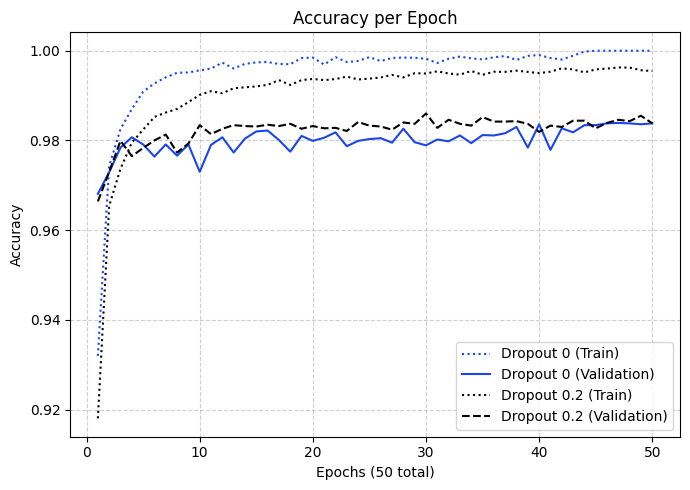

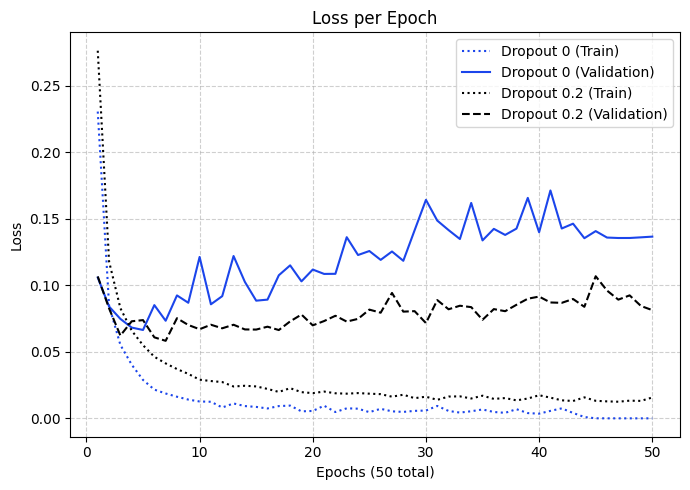

In [ ]:
# ----------------------------------------------------
# Plot validation accuracy and loss over epochs
# ----------------------------------------------------
epochs = range(1, 51)

# Plot accuracy comparison in a separate figure
plt.figure(figsize=(7, 5)) # Adjusted figure size for a single plot
plt.plot(epochs, hist_0.history['accuracy'], label='Dropout 0 (Train)', color=logo_blue, linestyle=':')
plt.plot(epochs, hist_0.history['val_accuracy'], label='Dropout 0 (Validation)', color=logo_blue)
plt.plot(epochs, hist_02.history['accuracy'], label='Dropout 0.2 (Train)', color=logo_black, linestyle=':')
plt.plot(epochs, hist_02.history['val_accuracy'], label='Dropout 0.2 (Validation)', color=logo_black, linestyle='--')
plt.title("Accuracy per Epoch")
plt.xlabel(f"Epochs ({epochs[-1]} total)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot loss comparison in a separate figure
plt.figure(figsize=(7, 5)) # Adjusted figure size for a single plot
plt.plot(epochs, hist_0.history['loss'], label='Dropout 0 (Train)', color=logo_blue, linestyle=':')
plt.plot(epochs, hist_0.history['val_loss'], label='Dropout 0 (Validation)', color=logo_blue)
plt.plot(epochs, hist_02.history['loss'], label='Dropout 0.2 (Train)', color=logo_black, linestyle=':')
plt.plot(epochs, hist_02.history['val_loss'], label='Dropout 0.2 (Validation)', color=logo_black, linestyle='--')
plt.title("Loss per Epoch")
plt.xlabel(f"Epochs ({epochs[-1]} total)")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

4. Visualizing predictions from the Dropout 0 and Dropout 0.2 models

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


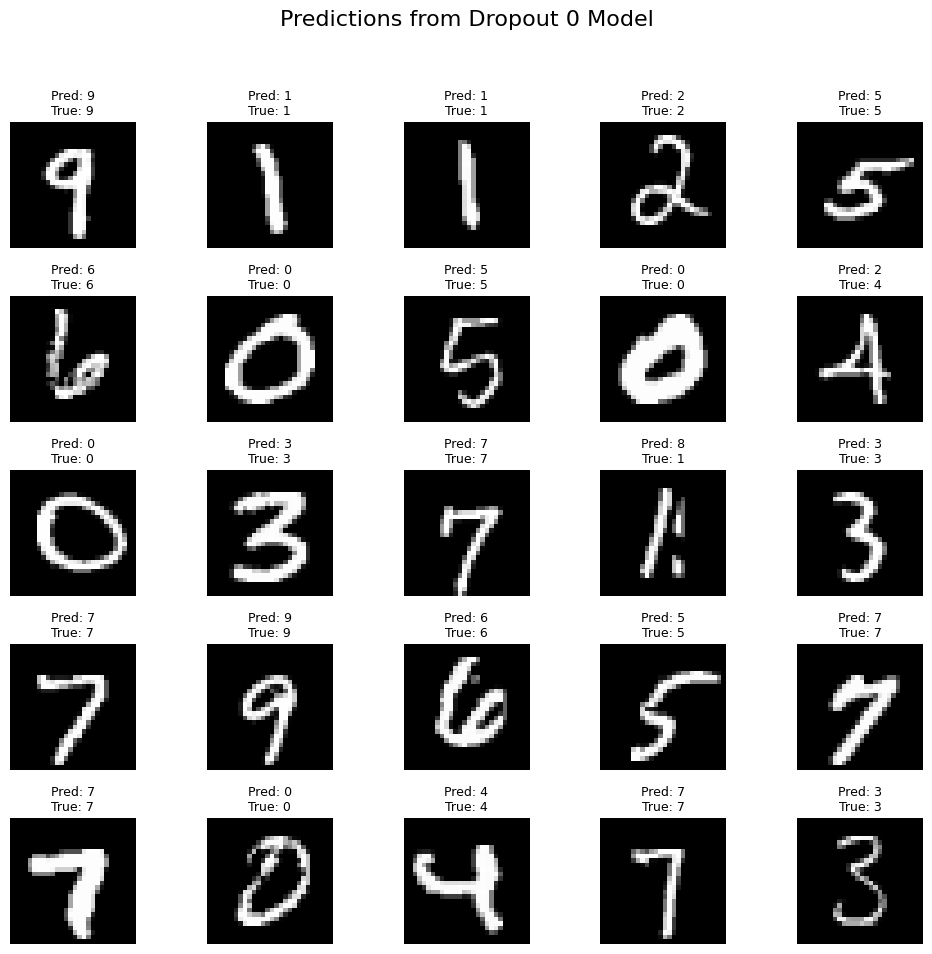

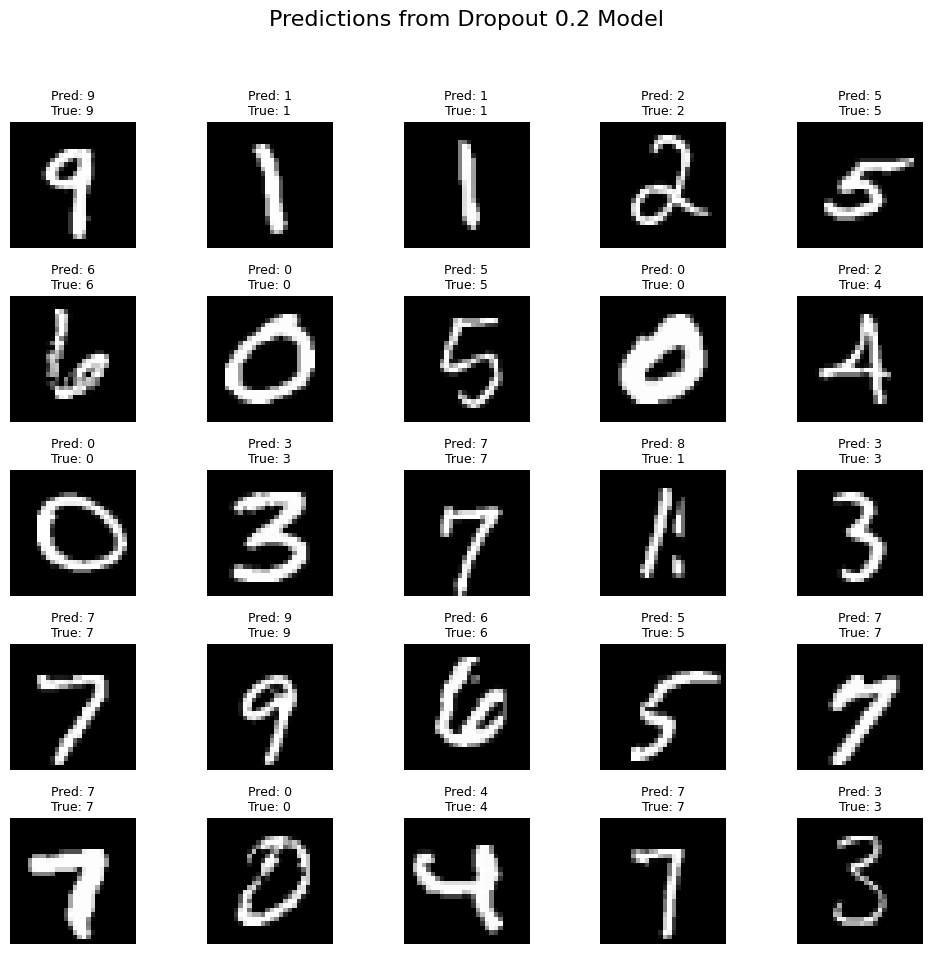

In [ ]:
# ----------------------------------------------------
# Visualizing predictions from the Dropout 0 and Dropout 0.2 models
# ----------------------------------------------------

# Get predictions for the test set
y_pred_probs_0 = model_0.predict(x_test)                     # Probabilities for each class for model_0
y_pred_0 = np.argmax(y_pred_probs_0, axis=1)                # Choose highest-probability class for model_0

y_pred_probs_02 = model_02.predict(x_test)                   # Probabilities for each class for model_02
y_pred_02 = np.argmax(y_pred_probs_02, axis=1)              # Choose highest-probability class for model_02


# Select 25 random test images (using the same indices for both models)
indices = np.random.choice(len(x_test), 25, replace=False)

# Plot the images with predicted and true labels for the Dropout 0 model
plt.figure(figsize=(10, 10))
plt.suptitle("Predictions from Dropout 0 Model", fontsize=16)
for i, idx in enumerate(indices):
    img = x_test[idx].reshape(28, 28)
    true_label = y_test[idx]
    pred_label = y_pred_0[idx]
    plt.subplot(5, 5, i+1)
    plt.imshow(img, cmap="gray")
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", fontsize=9)
    plt.axis("off")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot the images with predicted and true labels for the Dropout 0.2 model
plt.figure(figsize=(10, 10))
plt.suptitle("Predictions from Dropout 0.2 Model", fontsize=16)
for i, idx in enumerate(indices):
    img = x_test[idx].reshape(28, 28)
    true_label = y_test[idx]
    pred_label = y_pred_02[idx]
    plt.subplot(5, 5, i+1)
    plt.imshow(img, cmap="gray")
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", fontsize=9)
    plt.axis("off")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()